**20250805 Economics Analysis - NASDAQ API selected time series**

I found FRED data indicators selected by NASDAQ for its API. Discontinued time series are removed for the purpose of this exercise. 

https://data.nasdaq.com/data/FRED-federal-reserve-economic-data/documentation

In [1]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fredapi import Fred
from pandas_datareader import data as pdr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.svm import SVR

In [2]:
# Input FRED API key here
# fred_key ="Your FRED API Key here"
#fred_key =""
fred = Fred(fred_key)

In [3]:
df_fred_list = pd.read_csv('E:/Workspace/Programming/Data/FRED/FRED_Series_List.csv')
df_fred_list 

,Source,Country,Region,Category,Code,Indicator,Frequency,Unit
0,FRED,USA,National,Growth,GDP,Gross Domestic Product,Quarterly,Billions of Dollars
1,FRED,USA,National,Growth,GDPC1,Real Gross Domestic Product,Quarterly,Billions of Chained 2017 Dollars
2,FRED,USA,National,Growth,GDPPOT,Real Potential Gross Domestic Product,Quarterly,Billions of Chained 2017 Dollars
3,FRED,USA,National,Prices and Inflation,CPIAUCSL,Consumer Price Index for All Urban Consumers: ...,Monthly,Index 1982-1984=100
4,FRED,USA,National,Prices and Inflation,CPILFESL,Consumer Price Index for All Urban Consumers: ...,Monthly,Index 1982-1984=100
5,FRED,USA,National,Prices and Inflation,GDPDEF,Gross Domestic Product: Implicit Price Deflator,Quarterly,Index 2017=100
6,FRED,USA,National,Money Supply,BASE,St. Louis Adjusted Monetary Base,Monthly,Billions of Dollars
7,FRED,USA,National,Money Supply,M1,M1 Money Stock,Weekly,Billions of Dollars
8,FRED,USA,National,Money Supply,M2,M2 Money Stock,Weekly,Billions of Dollars
9,FRED,USA,National,Money Supply,M1V,Velocity of M1 Money Stock,Quarterly,Ratio


In [4]:
start_date = "2017-01-01"
#end_date = '2023-12-31'

In [5]:
fred_series_id = df_fred_list['Code']
df_fred_data = pdr.DataReader(fred_series_id, 'fred', start=start_date) #end=end_date)
df_fred_data
#df_fred_data.ffill()
#df_fred_data.to_csv('fred_data.csv', index=True) 

,GDP,GDPC1,GDPPOT,CPIAUCSL,CPILFESL,GDPDEF,BASE,M1,M2,M1V,...,CP,STLFSI,DCOILWTICO,USSLIND,DTWEXM,DTWEXB,GFDEBTN,GFDEGDQ188S,EXCSRESNW,TOTCI
DATE,,,,,,,,,,,,,,,,,,,,,
2017-01-01,19280.084,19398.343,19622.17184,243.618,250.467,99.39,NaN,NaN,NaN,5.635,...,2045.666,NaN,NaN,1.73,NaN,NaN,19846420.0,102.93741,NaN,NaN
2017-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3351.8,13223.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,52.36,NaN,96.4677,128.7580,NaN,NaN,NaN,NaN
2017-01-04,NaN,NaN,NaN,NaN,NaN,NaN,3418.48,NaN,NaN,NaN,...,NaN,NaN,53.26,NaN,95.8582,128.5398,NaN,NaN,1789629.0,2076.2795
2017-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,53.77,NaN,94.8563,127.5844,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-07-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-07-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Personal Saving Rate, Consumption and Disposable Income**

Personal Saving Rate (PSAVERT)

Personal Consumption Expenditures (PCE)

Disposable Personal Income (DSPI)

Let's take a look at their correlations among these three.

In [6]:
df_saving_expenditure = df_fred_data[["PSAVERT", "PCE", "DSPI"]]
df_saving_expenditure = df_saving_expenditure.dropna()
df_saving_expenditure.head()

,PSAVERT,PCE,DSPI
DATE,,,
2017-01-01,5.3,13063.7,14294.2
2017-02-01,5.6,13088.4,14356.4
2017-03-01,5.6,13139.9,14408.5
2017-04-01,5.7,13169.2,14468.8
2017-05-01,6.3,13171.9,14563.6


In [7]:
#set PCE and DSPI as percentage of 2017 Jan value
expenditure_base_2017 = df_saving_expenditure[["PCE", "DSPI"]].iloc[0]
df_saving_expenditure[["PCE", "DSPI"]] = df_saving_expenditure[["PCE", "DSPI"]].div(expenditure_base_2017)
df_saving_expenditure.head()

,PSAVERT,PCE,DSPI
DATE,,,
2017-01-01,5.3,1.000000,1.000000
2017-02-01,5.6,1.001891,1.004351
2017-03-01,5.6,1.005833,1.007996
2017-04-01,5.7,1.008076,1.012215
2017-05-01,6.3,1.008282,1.018847


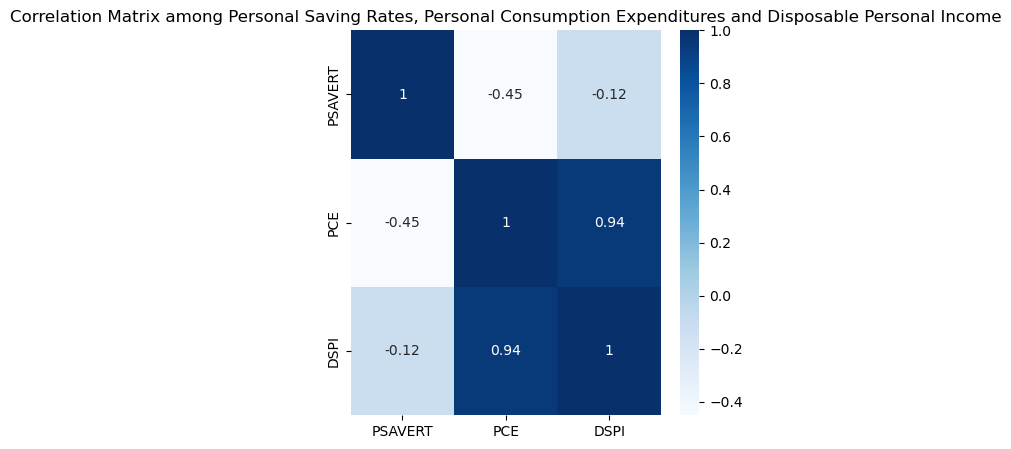

In [8]:
plt.figure(figsize = (5,5))
ax = plt.axes()
sns.heatmap(df_saving_expenditure.corr(), cmap="Blues", annot=True, ax = ax)
ax.set_title('Correlation Matrix among Personal Saving Rates, Personal Consumption Expenditures and Disposable Personal Income')
plt.show()

It seems that change in personal disposable income does not correlate much to change in Personal Saving Rate.  Personal Consumption Expenditures and Disposable Personal Income are highly correlated as expected.

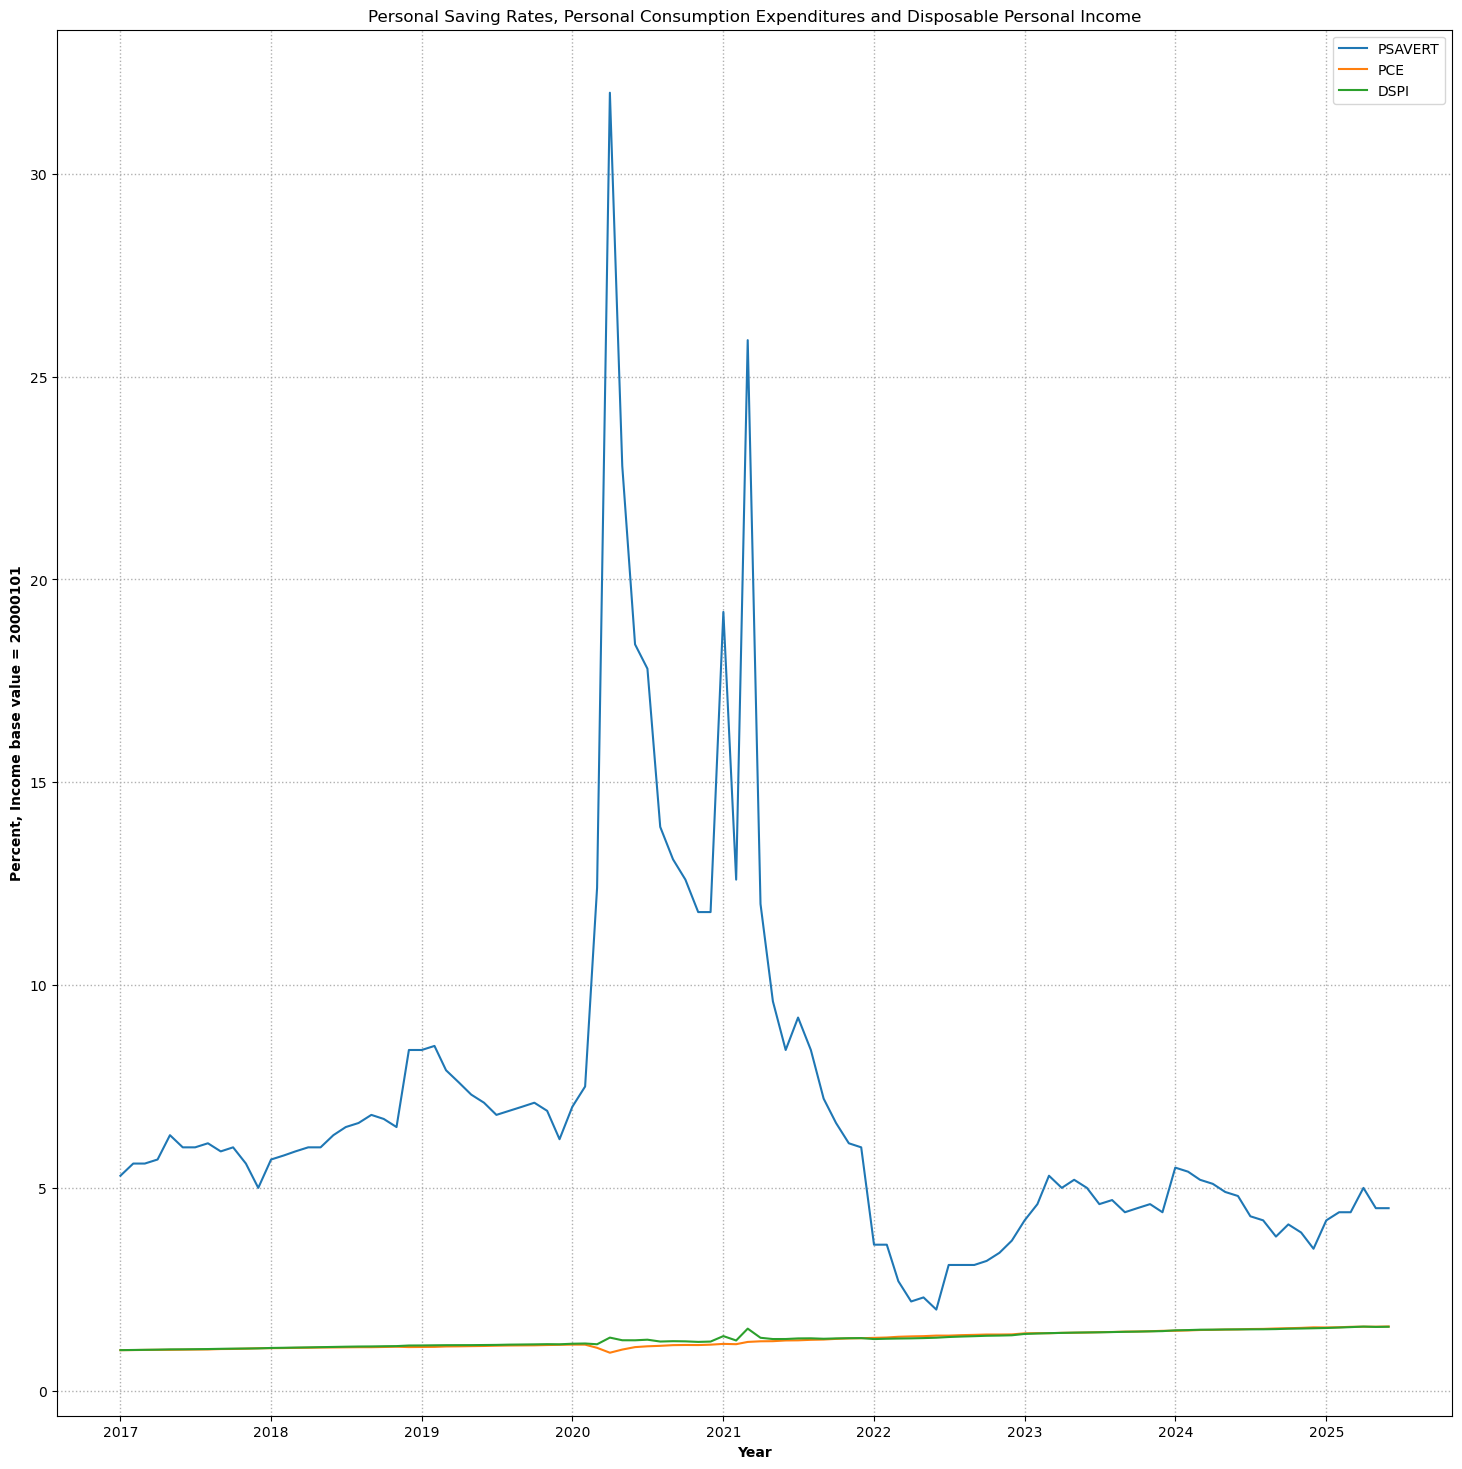

In [9]:
plt.figure(figsize = (18,18))
for i in range(len(df_saving_expenditure.columns)):
    plt.plot(df_saving_expenditure.index, df_saving_expenditure.iloc[:,i].values, 
             label=df_saving_expenditure.iloc[:,i].name)


plt.xlabel("Year", fontweight = 'bold')
plt.ylabel("Percent, Income base value = 20000101", fontweight = 'bold')
plt.title("Personal Saving Rates, Personal Consumption Expenditures and Disposable Personal Income")
plt.grid(True, ls=':', lw=1)
plt.legend()
plt.show()


**Applying Supervised Learning - Linear Regression Model on US rates time series and other time series**

Effective Federal Funds Rate	DFF

3-Month Treasury Bill: Secondary Market Rate	DTB3

5-Year Treasury Constant Maturity Rate	DGS5

10-Year Treasury Constant Maturity Rate	DGS10

30-Year Treasury Constant Maturity Rate	DGS30

5-year Breakeven Inflation Rate	T5YIE

10-year Breakeven Inflation Rate	T10YIE

5-Year, 5-Year Forward Inflation Expectation Rate	T5YIFR

Bank Prime Loan Rate	DPRIME

Crude Oil Prices: West Texas Intermediate (WTI) - Cushing, Oklahoma	 DCOILWTICO

Trade Weighted U.S. Dollar Index: Major Currencies	DTWEXM

Trade Weighted U.S. Dollar Index: Broad	DTWEXB


In [10]:
df_rates = df_fred_data[['DFF', 'DTB3','DGS5','DGS10','DGS30','DPRIME', 'T5YIE','T10YIE','T5YIFR', 'DCOILWTICO',
                        'DTWEXM', 'DTWEXB']]
df_rates = df_rates.dropna()
df_rates

,DFF,DTB3,DGS5,DGS10,DGS30,DPRIME,T5YIE,T10YIE,T5YIFR,DCOILWTICO,DTWEXM,DTWEXB
DATE,,,,,,,,,,,,
2017-01-03,0.66,0.53,1.94,2.45,3.04,3.75,1.86,1.98,2.10,52.36,96.4677,128.7580
2017-01-04,0.66,0.52,1.94,2.46,3.05,3.75,1.86,1.99,2.12,53.26,95.8582,128.5398
2017-01-05,0.66,0.51,1.86,2.37,2.96,3.75,1.83,1.95,2.07,53.77,94.8563,127.5844
2017-01-06,0.66,0.52,1.92,2.42,3.00,3.75,1.84,1.96,2.08,53.98,95.2662,127.9861
2017-01-09,0.66,0.50,1.89,2.38,2.97,3.75,1.85,1.95,2.05,51.95,95.1949,128.0519
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,1.55,1.55,1.72,1.90,2.33,4.75,1.67,1.75,1.83,61.17,92.0516,129.1831
2019-12-26,1.55,1.55,1.72,1.90,2.33,4.75,1.66,1.74,1.82,61.72,91.9234,129.0163
2019-12-27,1.55,1.54,1.68,1.88,2.32,4.75,1.64,1.73,1.82,61.76,91.4593,128.6101


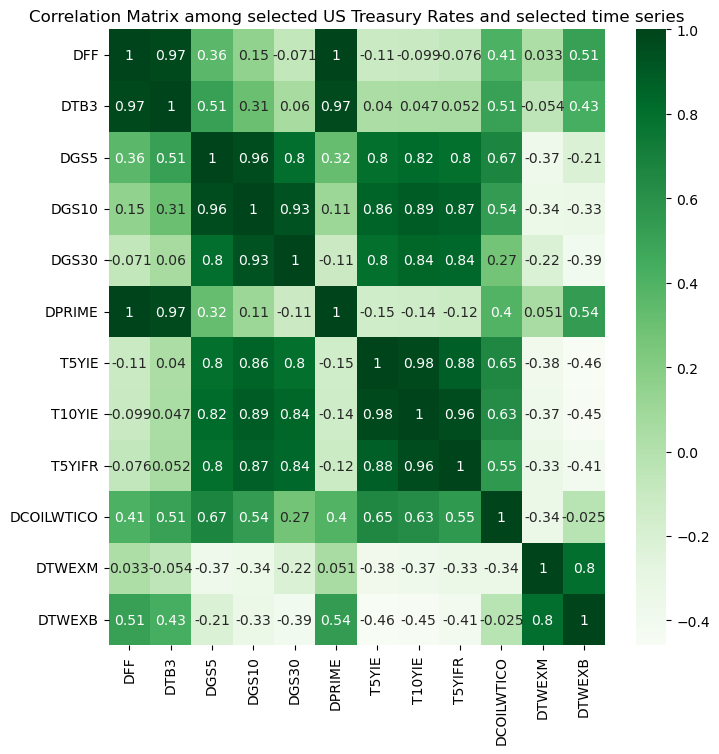

In [11]:
plt.figure(figsize = (8,8))
ax = plt.axes()
sns.heatmap(df_rates.corr(), cmap="Greens", annot=True, ax = ax)
ax.set_title('Correlation Matrix among selected US Treasury Rates and selected time series')
plt.show()

Effective Federal Funds Rate DFF and Bank Prime Loan Rate DPRIME have a correlation of 1.  It is likely that Prime Loan Rate is set to the same/similar level as Federal Funds Rate.  Therefore, DPRIME is not a suitable dependent variable to predict DFF.

Let's try to predict Fed Fund Rates, US Treasury 3M, 5Y Rate, 10Y and 30Y rates using 5Y and 10Y Breakeven Inflation Rate, 5Y Forward Inflation Rate, Crude Oil and the two Trade Weighted USD indices.

The data is fitted into a supervised learning linear regression model (sklearn's LinearRegression).   Test size is 30% of the data set. 

In [12]:
df_dff_supervised_ml = df_fred_data[['DFF','T5YIE','T10YIE','T5YIFR', 'DCOILWTICO',
                        'DTWEXM', 'DTWEXB']]
df_dff_supervised_ml = df_dff_supervised_ml.dropna()
df_dff_supervised_ml_Y = df_dff_supervised_ml[['DFF']]
df_dff_supervised_ml_X = df_dff_supervised_ml.drop(['DFF'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(df_dff_supervised_ml_X, df_dff_supervised_ml_Y, 
                                                    test_size=0.3, random_state=117)
dff_model = LinearRegression()
dff_model.fit(X_train, y_train)
dff_predict = dff_model.predict(X_test)
r2 = r2_score(y_test, dff_predict)

# Access coefficients and intercept
print('Supervised Learning Linear Regression: Effective Federal Funds Rate DFF')
print(f"Coefficient: {dff_model.coef_}")
print(f"Intercept: {dff_model.intercept_}")
print(f"R-squared score: {r2}")

Supervised Learning Linear Regression: Effective Federal Funds Rate DFF
Coefficient: [[-0.03144109  0.17737743  0.38619595 -0.0006783  -0.25412298  0.19280969]]
Intercept: [-0.33222917]
R-squared score: 0.7060239898934004


In [13]:
df_DTB3_supervised_ml = df_fred_data[['DTB3','T5YIE','T10YIE','T5YIFR', 'DCOILWTICO',
                        'DTWEXM', 'DTWEXB']]
df_DTB3_supervised_ml = df_DTB3_supervised_ml.dropna()
df_DTB3_supervised_ml_Y = df_DTB3_supervised_ml[['DTB3']]
df_DTB3_supervised_ml_X = df_DTB3_supervised_ml.drop(['DTB3'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(df_DTB3_supervised_ml_X, df_DTB3_supervised_ml_Y, 
                                                    test_size=0.3, random_state=117)
DTB3_model = LinearRegression()
DTB3_model.fit(X_train, y_train)
DTB3_predict = DTB3_model.predict(X_test)
r2 = r2_score(y_test, DTB3_predict)

# Access coefficients and intercept
print('Supervised Learning Linear Regression: 3-Month Treasury Bill: Secondary Market Rate DTB3')
print(f"Coefficient: {DTB3_model.coef_}")
print(f"Intercept: {DTB3_model.intercept_}")
print(f"R-squared score: {r2}")

Supervised Learning Linear Regression: 3-Month Treasury Bill: Secondary Market Rate DTB3
Coefficient: [[ 0.46574254  0.36406023  0.26237793 -0.00550735 -0.29047956  0.21359412]]
Intercept: [-0.35095187]
R-squared score: 0.7186753082490411


In [14]:
df_DGS5_supervised_ml = df_fred_data[['DGS5','T5YIE','T10YIE','T5YIFR', 'DCOILWTICO',
                        'DTWEXM', 'DTWEXB']]
df_DGS5_supervised_ml = df_DGS5_supervised_ml.dropna()
df_DGS5_supervised_ml_Y = df_DGS5_supervised_ml[['DGS5']]
df_DGS5_supervised_ml_X = df_DGS5_supervised_ml.drop(['DGS5'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(df_DGS5_supervised_ml_X, df_DGS5_supervised_ml_Y, 
                                                    test_size=0.3, random_state=117)
DGS5_model = LinearRegression()
DGS5_model.fit(X_train, y_train)
DGS5_predict = DGS5_model.predict(X_test)
r2 = r2_score(y_test, DGS5_predict)

# Access coefficients and intercept
print('Supervised Learning Linear Regression: 5-Year Treasury Constant Maturity Rate DGS5')
print(f"Coefficient: {DGS5_model.coef_}")
print(f"Intercept: {DGS5_model.intercept_}")
print(f"R-squared score: {r2}")

Supervised Learning Linear Regression: 5-Year Treasury Constant Maturity Rate DGS5
Coefficient: [[ 1.10771191  0.96678565  0.82585939 -0.01692424 -0.15335239  0.1026209 ]]
Intercept: [-1.16457106]
R-squared score: 0.8378280407900661


In [15]:
df_DGS10_supervised_ml = df_fred_data[['DGS10','T5YIE','T10YIE','T5YIFR', 'DCOILWTICO',
                        'DTWEXM', 'DTWEXB']]
df_DGS10_supervised_ml = df_DGS10_supervised_ml.dropna()
df_DGS10_supervised_ml_Y = df_DGS10_supervised_ml[['DGS10']]
df_DGS10_supervised_ml_X = df_DGS10_supervised_ml.drop(['DGS10'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(df_DGS10_supervised_ml_X, df_DGS10_supervised_ml_Y, 
                                                    test_size=0.3, random_state=117)
DGS10_model = LinearRegression()
DGS10_model.fit(X_train, y_train)
DGS10_predict = DGS10_model.predict(X_test)
r2 = r2_score(y_test, DGS10_predict)

# Access coefficients and intercept
print('Supervised Learning Linear Regression: 10-Year Treasury Constant Maturity Rate DGS10')
print(f"Coefficient: {DGS10_model.coef_}")
print(f"Intercept: {DGS10_model.intercept_}")
print(f"R-squared score: {r2}")

Supervised Learning Linear Regression: 10-Year Treasury Constant Maturity Rate DGS10
Coefficient: [[ 1.07056284  0.97621427  0.88186571 -0.02358909 -0.10002711  0.06820884]]
Intercept: [-1.13807158]
R-squared score: 0.8556343326917687


In [16]:
df_DGS30_supervised_ml = df_fred_data[['DGS30','T5YIE','T10YIE','T5YIFR', 'DCOILWTICO',
                        'DTWEXM', 'DTWEXB']]
df_DGS30_supervised_ml = df_DGS30_supervised_ml.dropna()
df_DGS30_supervised_ml_Y = df_DGS30_supervised_ml[['DGS30']]
df_DGS30_supervised_ml_X = df_DGS30_supervised_ml.drop(['DGS30'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(df_DGS30_supervised_ml_X, df_DGS30_supervised_ml_Y, 
                                                    test_size=0.3, random_state=117)
DGS30_model = LinearRegression()
DGS30_model.fit(X_train, y_train)
DGS30_predict = DGS30_model.predict(X_test)
r2 = r2_score(y_test, DGS30_predict)

# Access coefficients and intercept
print('Supervised Learning Linear Regression: 30-Year Treasury Constant Maturity Rate DGS30')
print(f"Coefficient: {DGS30_model.coef_}")
print(f"Intercept: {DGS30_model.intercept_}")
print(f"R-squared score: {r2}")

Supervised Learning Linear Regression: 30-Year Treasury Constant Maturity Rate DGS30
Coefficient: [[ 0.84185267  0.79333698  0.74482128 -0.02718362 -0.03653884  0.03099067]]
Intercept: [-0.62182558]
R-squared score: 0.8381574522931634
